# Surprise 기본 활용

In [2]:
import numpy as np
from surprise import BaselineOnly, KNNWithMeans, SVD, SVDpp, Dataset, accuracy, Reader
from surprise.model_selection import cross_validate, train_test_split
import matplotlib.pyplot as plt

data = Dataset.load_builtin(name=u'ml-100k')

# train test 분리
trainset, testset = train_test_split(data, test_size=0.25)

algo = KNNWithMeans()
algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9571


0.9571104973575206

Estimating biases using als...
RMSE: 0.9486
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9571
RMSE: 0.9431
RMSE: 0.9245


array([0.92445951, 0.94314228, 0.94857851, 0.9571105 ])

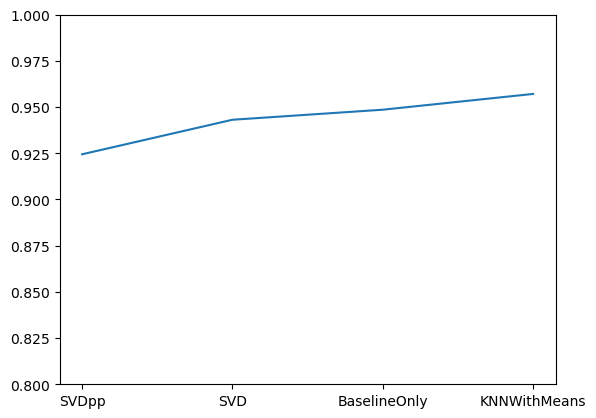

In [4]:
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []

for option in algorithms:
    algo = option()
    names.append(option.__name__)
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
    
names = np.array(names)
results = np.array(results)

index = np.argsort(results)
plt.ylim(0.8,1)
plt.plot(names[index], results[index])
results[index]

# Surprise 알고리즘 옵션 지정

In [5]:
sim_options = {'name': 'pearson_baseline', 'user_based': True}
algo = KNNWithMeans(k=30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9467


0.9467272448437085